<a href="https://colab.research.google.com/github/sayan0506/Tensorflow-Advanced-Techniques-Specialization/blob/main/Custom_Dense_Layer_creation_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer

print(tf.version.VERSION)

2.3.0


In [13]:
# we create lambda layer for extra functionality or customization
lambda_layer = tf.keras.layers.Lambda(lambda x: abs(x))

model = tf.keras.models.Sequential([lambda_layer])

In [14]:
# creating custom input and output dataset
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype=float)
ys = np.array([-3.0, -1.0, 2.0,3.0,5.0,7.0], dtype = float)

# Our goal here is to train the network from the dataset which is close to the optimized function [Y = (2 * X) -1] 

In [15]:
# Building a custom Dense layer(Object-oriented)

class SimpleDense(Layer):
  # the number of units are initialized to 32
  def __init__(self, units= 32):
    super(SimpleDense, self).__init__()
    self.units = units
  
  # building the state of the layer (Kernels, Biases)
  def build(self, input_shape):
    # initializer object for kernels
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name = 'kernel', initial_value = w_init(shape = (input_shape[-1], self.units), dtype = 'float32'), trainable = True)
    
    # for biases
    b_init = tf.random_normal_initializer()
    self.b = tf.Variable(name = 'kernel', initial_value = b_init(shape = (self.units,), dtype = 'float32'), trainable = True)
    
  # forward propagation is done here  
  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

In [16]:
# Let us build a single neuron neural network with the custom dense layer with Keras Sequential API
model = tf.keras.Sequential([SimpleDense(units = 1)])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(xs, ys, epochs = 500)
print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 15.0201
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 12.0213
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 9.6584
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 7.7958
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 6.3270
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 5.1680
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 4.2529
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 3.5297
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 2.9575
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 2.5042
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 2.1446
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 1.8586
Epoch 13/500
1/1 [==============================] - 0s 2ms

In [17]:
# our desired output is 
# 2*10 - 1 = 19(Pretty close)
# tuned parameters of the model

model.weights

# parameters are also tuned close to desired w= 1.96, b = -0.78 here approximately.

[<tf.Variable 'simple_dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9691561]], dtype=float32)>,
 <tf.Variable 'simple_dense_1/kernel:0' shape=(1,) dtype=float32, numpy=array([-0.7834312], dtype=float32)>]

In [18]:
# Also note here, as we are inheriting Layer class and also calling the Super class constructor, where we are also passing the subclass name, which automatically builds the layer, 
# or more precisely makes the Subclass object callable with the build and call function for state and forward propagataion purpose.  

In [28]:
# Now we are going to add activations to the custom layers
# Building a custom Dense layer(Object-oriented)

class SimpleDense(Layer):
  # the number of units are initialized to 32
  def __init__(self, units= 32, activation = None):
    super(SimpleDense, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)
  
  # building the state of the layer (Kernels, Biases)
  def build(self, input_shape):
    # initializer object for kernels
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name = 'kernel', initial_value = w_init(shape = (input_shape[-1], self.units), dtype = 'float32'), trainable = True)
    
    # for biases
    b_init = tf.random_normal_initializer()
    self.b = tf.Variable(name = 'kernel', initial_value = b_init(shape = (self.units,), dtype = 'float32'), trainable = True)
    # super.build(input_shape)

  # forward propagation is done here  
  def call(self, inputs):
    return self.activation(tf.matmul(inputs, self.w) + self.b)

In [29]:
# we implement this custom dense layer using a model on mnist dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

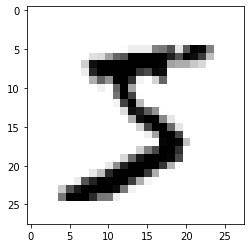

In [30]:
from matplotlib import pyplot as plt
# data visualization
plt.imshow(x_train[0], cmap = 'binary')

In [31]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    SimpleDense(128, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [32]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs = 5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2928 - accuracy: 0.9161
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1396 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1062 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9772


[0.07528362423181534, 0.9771999716758728]